<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/501_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B7%B8%EB%9E%98%ED%94%84%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 반복 호출시 경고창 에러
import warnings
warnings.filterwarnings(action='default')  # 경고 보이기 (default)
warnings.filterwarnings(action='ignore')  #  경고 감추기

In [1]:
# 그래프 한글 설정
# 코드설치후 런타임 다시시작.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,723 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and dire

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ai_chat_python

Mounted at /content/drive
/content/drive/MyDrive/ai_chat_python


In [2]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound']

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
# 음수축 정상적으로 표시할 때
plt.rcParams['axes.unicode_minus']=False

matplotlib으로 그래프 그리기

In [6]:
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


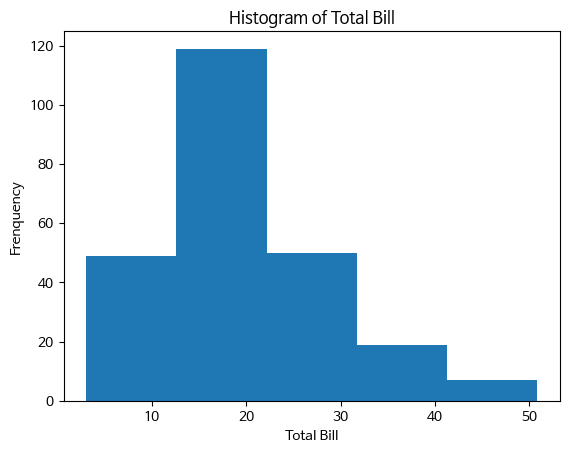

In [13]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=tips, x='total_bill', bins=5)

axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frenquency')

plt.show()

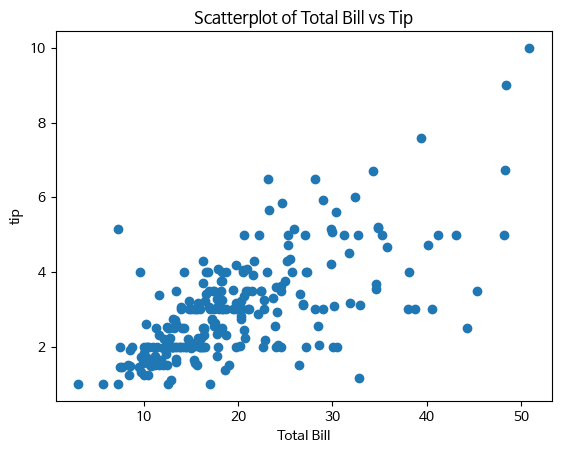

In [14]:
# 산점도 그래프 그리기

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])

axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('tip')

plt.show()

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

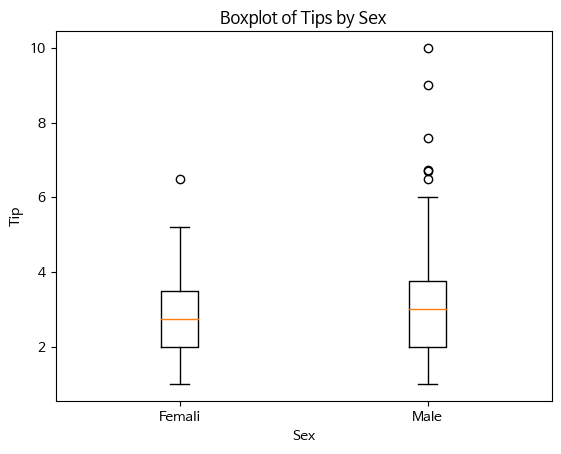

In [21]:
# 박스 그래프 그리기
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot(x=[tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']], labels=['Femali','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

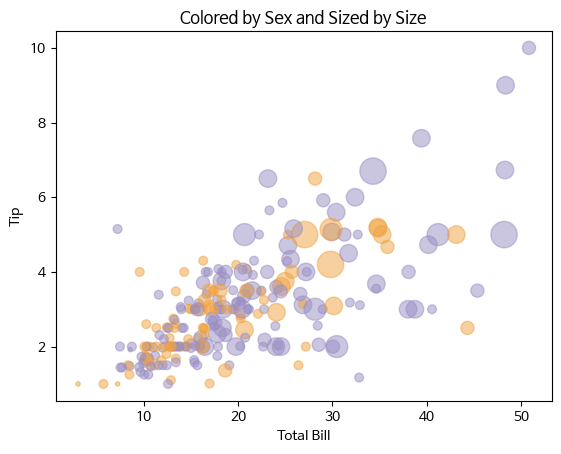

In [23]:
colors = {'Female':'#f1a340', 'Male':'#998ec3'}

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.scatter(data = tips, x ='total_bill', y='tip',s=tips['size']**2*10, c=tips['sex'].map(colors), alpha=0.5)

axes1.set_title('Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()


### seaborn으로 그래프 그리기

In [24]:
tips = sns.load_dataset('tips')

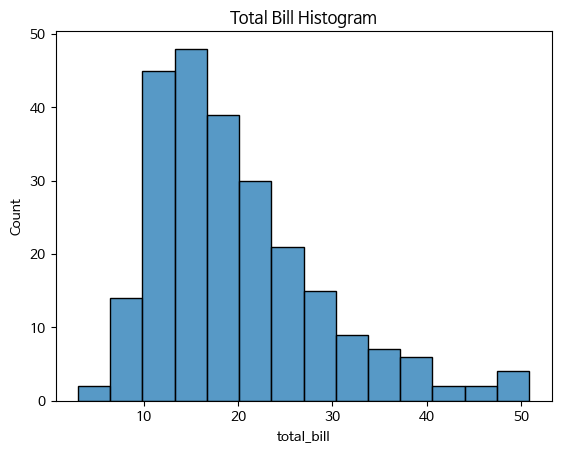

In [29]:
# 히스토그램 그리기

fig, ax = plt.subplots()
sns.histplot(data=tips, x='total_bill', ax=ax)

ax.set_title('Total Bill Histogram')

plt.show()

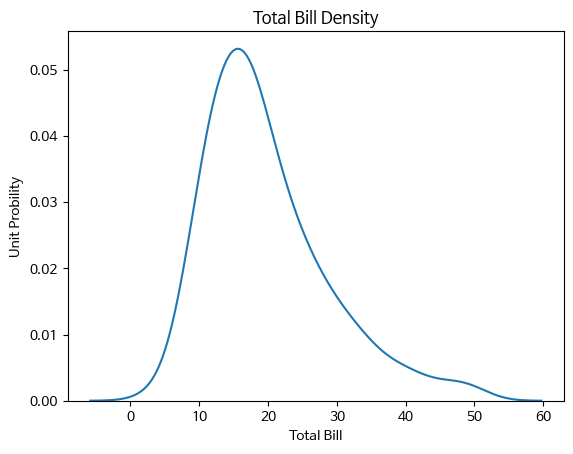

In [32]:
# 밀도 분포 그래프 그리기
fig, ax =plt.subplots()

sns.kdeplot(data = tips, x= 'total_bill', ax=ax)

ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probility')

plt.show()

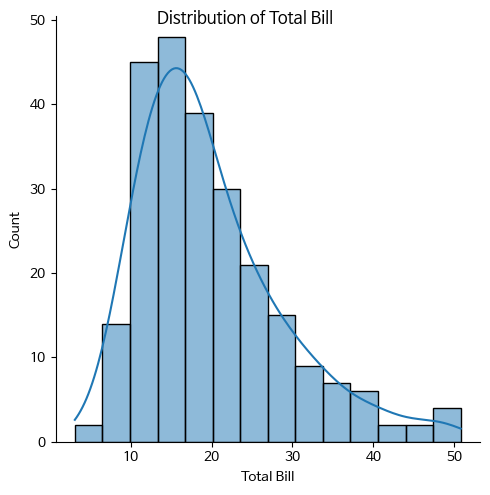

In [38]:
# kde : 밀집도 설정 (True, False)
fig = sns.displot(data=tips, x='total_bill', kde=True)

fig.set_axis_labels(x_var='Total Bill', y_var='Count')
fig.figure.suptitle('Distribution of Total Bill')

plt.show()

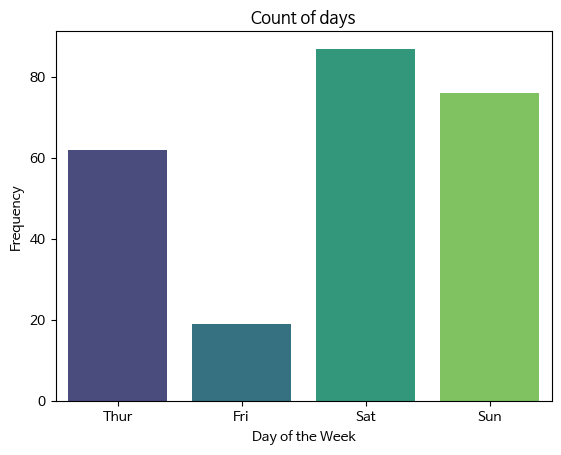

In [39]:
# 막대그래프
count, ax = plt.subplots()

sns.countplot(data=tips, x='day', palette='viridis', ax=ax)

ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

plt.show()

이변량 그래프 그리기

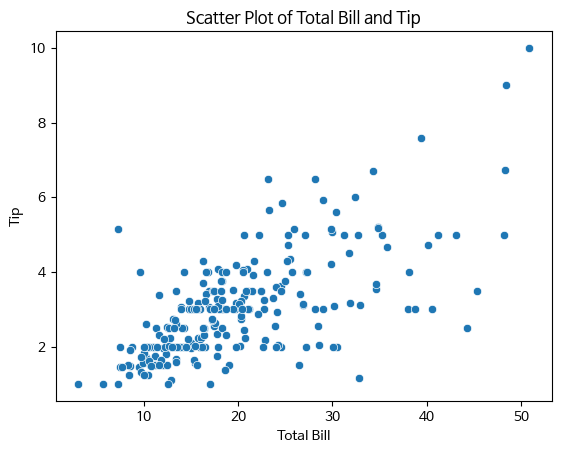

In [41]:
# 산점도 그래프 그리기
fig, ax = plt.subplots()

sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax)

ax.set_title('Scatter Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

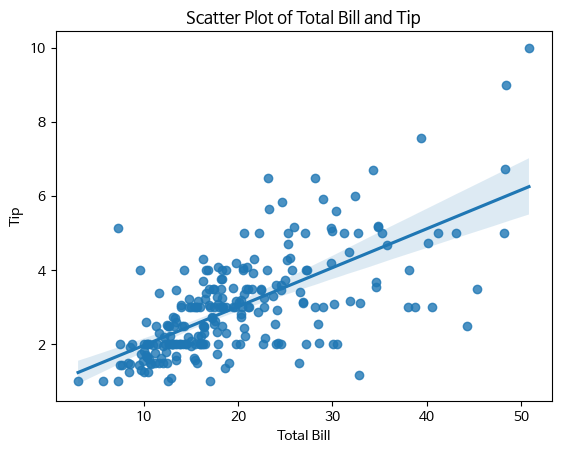

In [45]:
# 산점도 그래프 그리기
fig, ax = plt.subplots()


sns.regplot(data=tips, x='total_bill', y='tip', ax=ax)
# 회귀선을 제거할 때 fit_reg=False로 설정한다
# sns.regplot(data=tips, x='total_bill', y='tip', ax=ax, fit_reg=False)

ax.set_title('Scatter Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

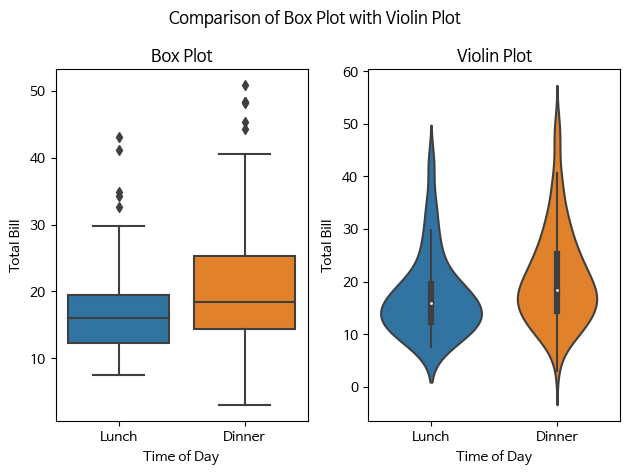

In [46]:
# boxplot과 violinplot 비교
box_violin, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

sns.boxplot(data=tips, x='time', y='total_bill', ax=ax1)
sns.violinplot(data=tips, x='time', y='total_bill', ax=ax2)

ax1.set_title('Box Plot')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Total Bill')

ax2.set_title('Violin Plot')
ax2.set_xlabel('Time of Day')
ax2.set_ylabel('Total Bill')

box_violin.suptitle('Comparison of Box Plot with Violin Plot')
box_violin.set_tight_layout(True)

plt.show()

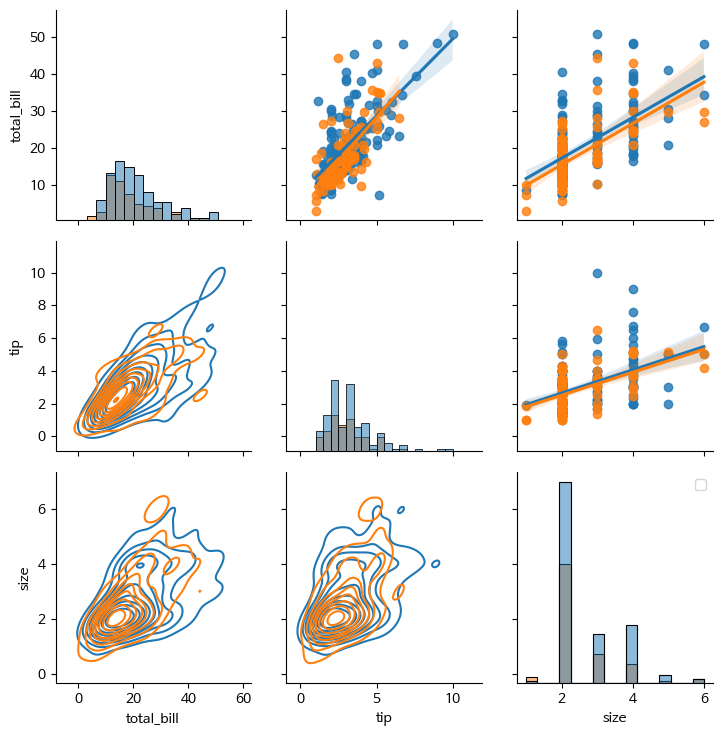

In [56]:
# 관계 그래프 그리기
# pair_grid = sns.PairGrid(tips, diag_sharey=False)
pair_grid = sns.PairGrid(tips, hue='sex')

pair_grid = pair_grid.map_upper(sns.regplot) # 산점도 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot) # 이차원 밀집 그래프
pair_grid = pair_grid.map_diag(sns.histplot) # 히스토그램 그래프

plt.legend()
plt.show()

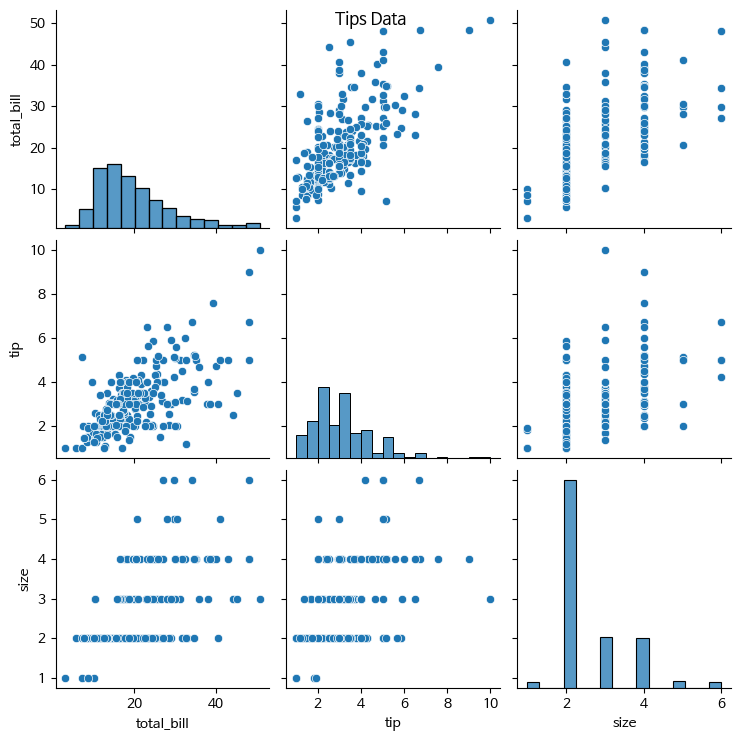

In [58]:
# pairplot
fig = sns.pairplot(data=tips)
fig.figure.suptitle('Tips Data')
plt.show()